In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
data= pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/인공지능/candy-data.csv")
df = pd.DataFrame(data=data)

In [21]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [22]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    df[i]=le.fit_transform(data[i])

In [24]:
df.head

<bound method NDFrame.head of     competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0                0          1       0        1               0       0   
1                1          1       0        0               0       1   
2               44          0       0        0               0       0   
3               45          0       0        0               0       0   
4                2          0       1        0               0       0   
..             ...        ...     ...      ...             ...     ...   
80              80          0       1        0               0       0   
81              81          0       1        0               0       0   
82              82          0       1        0               0       0   
83              83          0       0        1               0       0   
84              84          1       0        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0       

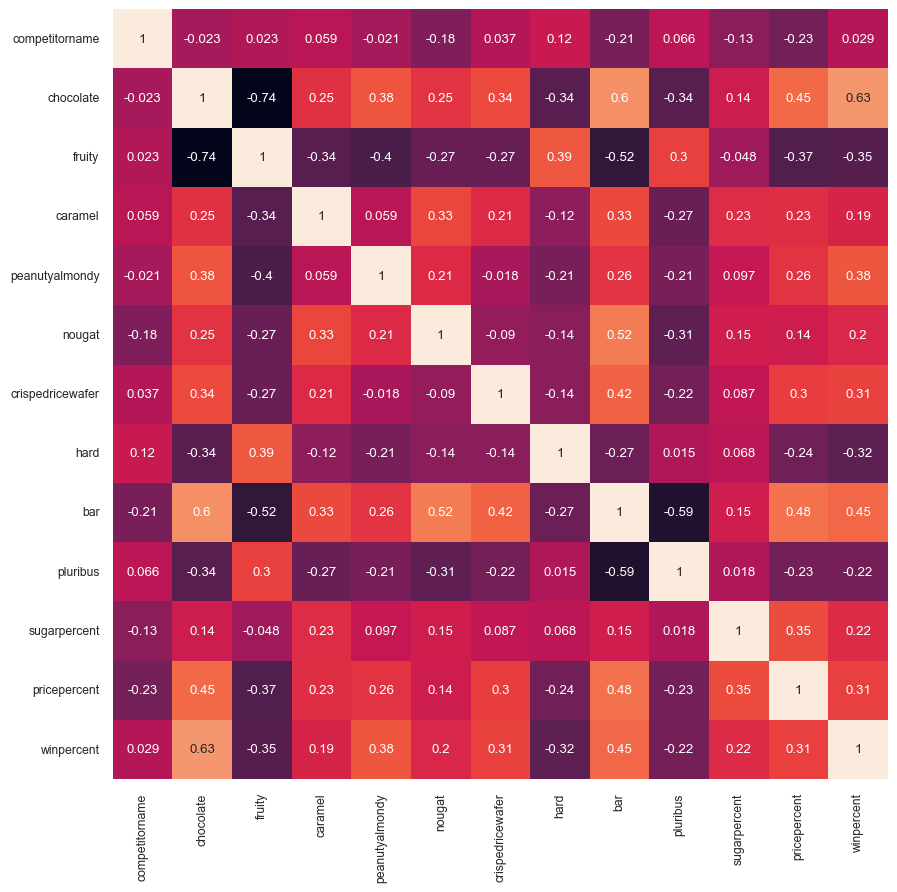

In [25]:
#상관 관계 행렬
data_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [49]:
# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

X = df.drop(['pricepercent','fruity','hard'], axis=1)
y = df['pricepercent']

y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
X_train.shape

(68, 10)

In [51]:
y_train.shape

(68, 29)

In [52]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (10,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                704       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [55]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

Epoch 1/100
3/3 [==============================] - 0s 65ms/step - loss: 0.1563 - mse: 0.1563 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0794 - mse: 0.0794 - val_loss: 0.0721 - val_mse: 0.0721
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0513 - val_mse: 0.0513
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0494 - mse: 0.0494 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0370 - mse: 0.03

3/3 [==============================] - 0s 12ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 64/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 65/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 66/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 67/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 68/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 69/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 70/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0361 - mse: 0.0361 - 

In [56]:
test_mse_score

0.03644286096096039

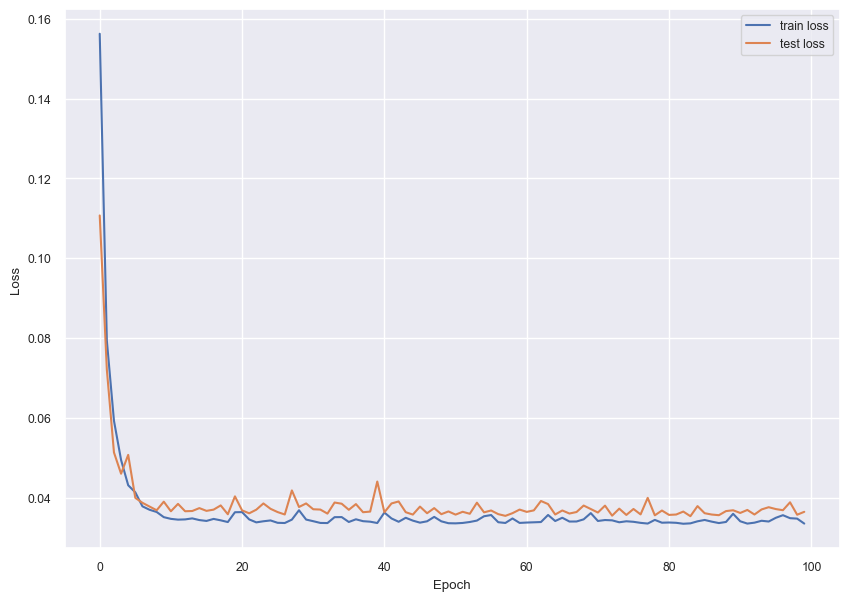

In [57]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

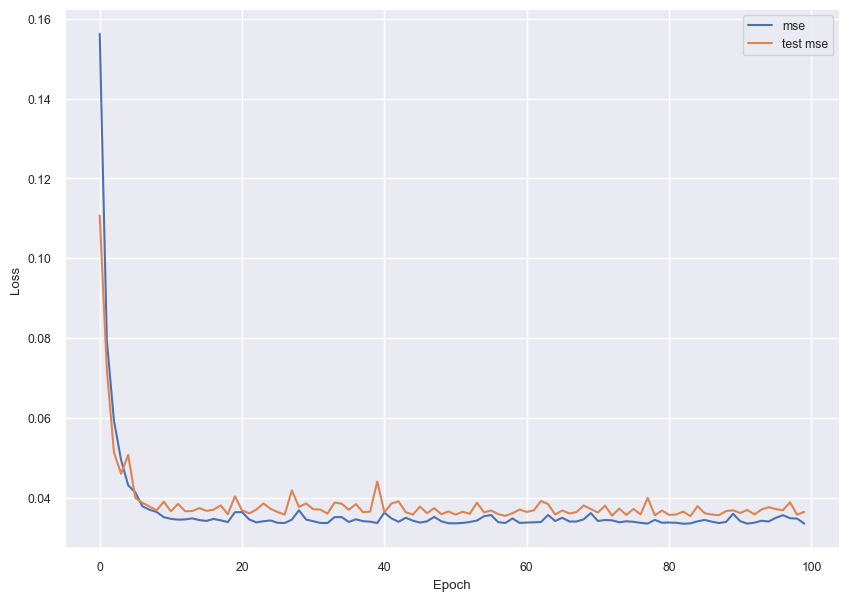

In [58]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()